# Project #3 Task 4: ANN Modelling and Model Performance Evaluation

   You are going to do Project #3 Task 4: ANN modeling.First, practice with synthetic dataset, and then use your project dataset

    
   Classwork: Practice with Synthetic data-based modeling to learn step by step how the ANN modeling and evaluation works
       
       a) Use balisticwithout wind data. The Projectile motion time of flight and range data has been generated by random 
       Inital velocity and intial angle. Therfore, using Input features (V0 and ang), and Target (Time, or R) peform ANN 
        modelling and Check if ANN perfectly discovred the physics (i.e, using 70% data for training, check if the model 
        predict the test 30% perfectly). In short, run two modeling 
            I ) Input features (V0 and ang), and Target (Time) 
           II ) Input features (V0 and ang), and Target (R) 
   
   
   Your Project #3 Task #4 is to be handed in.
       
          
       b) Using your CleanedFeatureSelected.xlsx file from Task #1, your task is to model Vp as a target, and the rest logs as input feature
           
           Input features a combination of (DEN, NEU, Vs), and Target (Vp) 
           
           Which combination of input features provided a good model for the target (Vp)? 
           Which combination of optimizers and activation functions gives good results?
           (Here, you will design different experiments and present your final result based on R2 comparison plotting in bar graph)
   
                  
 
 How the ANN modeling and Performance analysis work? 
       
       We will learn during lecture hr. The note is uploaded as lecture #4
       
       When you do your project works, feel free to contact me at my office or in the lab
       

In [2]:
###==========================================================================================================================###
#Please take time to read the following guide written in this box. 
#Here, you will get the brief information about the modelling
#The ANN modelling will be performed with Keras/Python built-in library
#if incase you dont have the tensor flow, you need to install by the following options

# Installing required libraries
#!pip install TensorFlow
#!pip install keras

###==========================================================================================================================###
# Here we will perform ANN after standardizing the dataset
   # It is reported that Standardization of the dataset improves the performance of a Multilayer Perceptron model on regression predictive modeling problems.
###==========================================================================================================================###
    
# Read this and the ANN modeling code is summarized as the following 

# Step 1 Data Loading/Importing
    # Import the pre-processed dataset from Task#1 
    # Target and predictor variables separation 
    # Standardization via python StandardScaler() function. 
    # Splitting data into training and test set 
    
# Step 2 ANN modeling  
 #2-1 CREATING ANN MODEL 
  #2.1.1 Defining the Input layer and FIRST hidden layer!
  #2-1.2 Defining the Second layer of the model
  #2-1.3 The output neuron is a single fully connected node 
# 2-2 COMPILING THE MODEL 
# 2-3 FITTING THE ANN to the Training set

# Step 3 Model prediction
   #Perform inverse transformation
   # Pediction and compare with measured data

# Step 4 Model performance analysis 
  # Here use R2 and MSE to evaluate the model accuracy of the prediction
###==========================================================================================================================###



# Install Tensorflow and keras

In [4]:
# Installing required libraries
!pip install tensorflow
!pip install keras

In [5]:
# Here Collect all the libraries used for this Task
# There are placed in different places to show for the students the process

# Import data

In [2]:
# Reading the CleanedFeatureSelected.xlsx data obtained from Task #1
import pandas as pd
import numpy as np
#
CleanedData =pd.read_excel('balisticwithoutwind.xlsx') # This file is just for practice to be familiar with the computation process
#CleanedData =pd.read_excel('CleanOutlier1.xlsx')  # Here, use your ClenaedFeatureSelected.xlsx file for the Task #4

CleanedData.head()


,V0,ang,Time,R
0,67.65,36.0,6.20,190.30
1,80.49,31.1,6.19,220.69
2,70.54,54.9,8.46,175.34
3,84.60,52.9,9.16,209.60
4,64.27,30.7,5.31,176.03


# Abstract

# Introduction

# ANN Modeling

# Standardize and Split (Training/Test)

In [8]:
# Separate Target Variable and Predictor Variables

# Task 1: Practice with Synthetic Data (Projectile without wind, target are either time, or range (R), Features are V0 and and)
TargetVariable=['Time']
#TargetVariable=['R']
Predictors=['V0', 'ang']
#Predictors=['V0', 'ang','Time']

#Task 2: Your project Later you will use your project cleaned here (Any combination of input features)
#TargetVariable=['Vp']
#Predictors=['Vs', 'DEN', 'NEU']

X=CleanedData[Predictors].values
y=CleanedData[TargetVariable].values


# Let us do standardization and data splitting......
### Standardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#CleanedData[TargetVariable].values
#CleanedData[TargetVariable].values

(210, 2)
(210, 1)
(90, 2)
(90, 1)


# ANN Modeling Step by Step

In [38]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU

# ============Create ANN model========================
model = Sequential()


# Defining the Input and FIRST hidden layers are the same! Dense allows nodes to be fully connected
model.add(Dense(units=5, input_dim=2, kernel_initializer='normal', activation='relu'))
#model.add(Dense(units=5, input_dim=2, kernel_initializer='normal', activation = 'LeakyReLU(negative_slope=0.1)'))
#model.add(LeakyReLU(negative_slope=0.1))

# Defining the Second layer of the model
# After the first layer we don't have to specify input_dim as Keras configure it automatically

model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

#======================# The output neuron is a single fully connected node =======================
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))



# ==================Compiling the model======================================
model.compile(loss='mean_squared_error', optimizer='adam')

# =================Fitting the ANN to the Training set======================

model.fit(X_train, y_train ,batch_size = 32, epochs = 500, verbose=0) # vebrose =1, allows to visualise the iteration. =0, not
 

#==================For Logging modeling loss history ========================

history = model.fit(X_train, y_train ,batch_size = 32, epochs = 500, verbose=1)


C:\Users\2900019\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013     
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012 
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012     
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 
Epoch 13/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012     
Epoch 14/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012     
Epoch 15/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013 
Epo

In [39]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 5)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 155 (624.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 104 (420.00 B)

In [40]:
print(model)

<Sequential name=sequential_3, built=True>


## Model prediction

In [42]:

#=============================================================
# Generating Predictions on testing data
Predictions=model.predict(X_test)
 
# Scaling the predicted data back to original scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test data back to original scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

####y_test_orig=y_test

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

#####Test_Data=X_test
#=============================================================

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Range']=y_test_orig
TestingData['Predicted Range']=Predictions
TestingData.head(20)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


,V0,ang,Range,Predicted Range
0,63.94,64.4,8.71,8.720592
1,61.60,40.7,6.38,6.375872
2,73.12,35.4,6.43,6.394471
3,71.05,56.0,8.60,8.575159
4,67.36,36.1,6.20,6.202603
5,66.51,62.5,8.79,8.756031
6,90.73,38.0,7.65,7.618180
7,98.97,49.1,9.48,9.479378
8,83.31,66.2,10.26,10.236221
9,77.43,47.7,8.18,8.261674


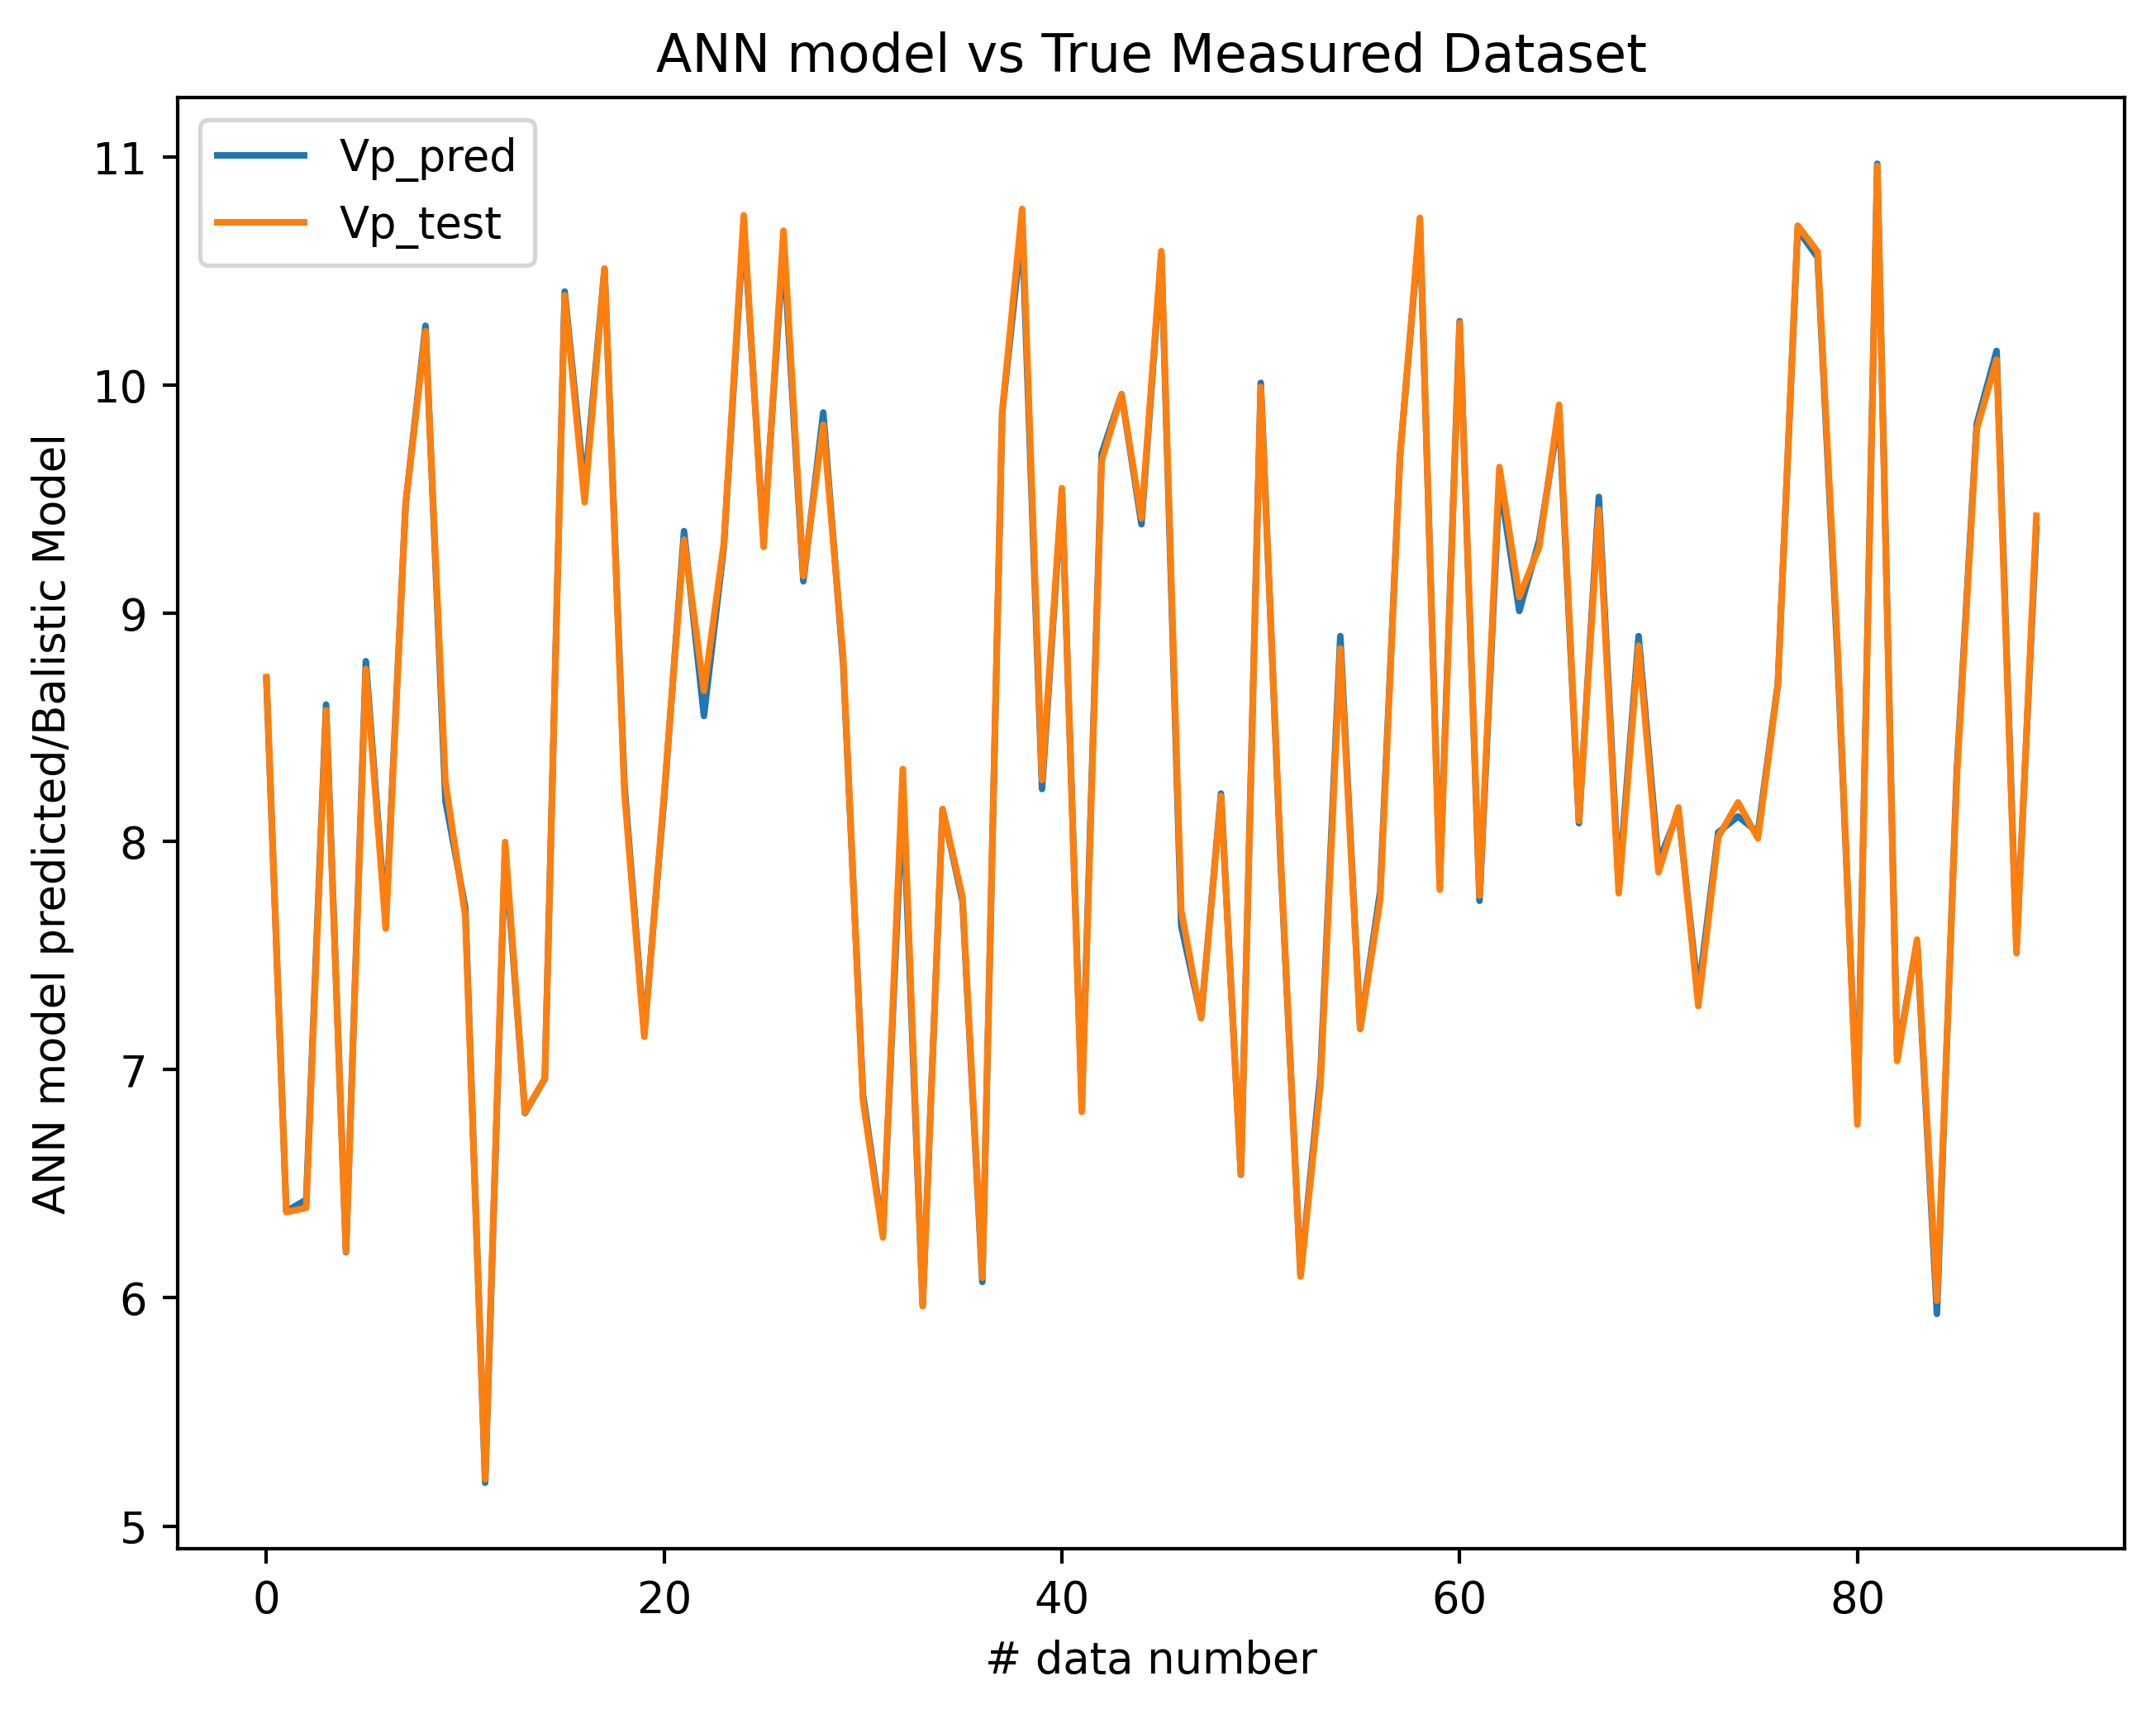

In [43]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=380)

plt.plot(y_test_orig)
plt.plot(Predictions)


plt.title('ANN model vs True Measured Dataset')
plt.ylabel('ANN model predicted/Balistic Model')
plt.xlabel('# data number')
plt.legend(['Vp_pred', 'Vp_test'], loc='upper left')
plt.show()



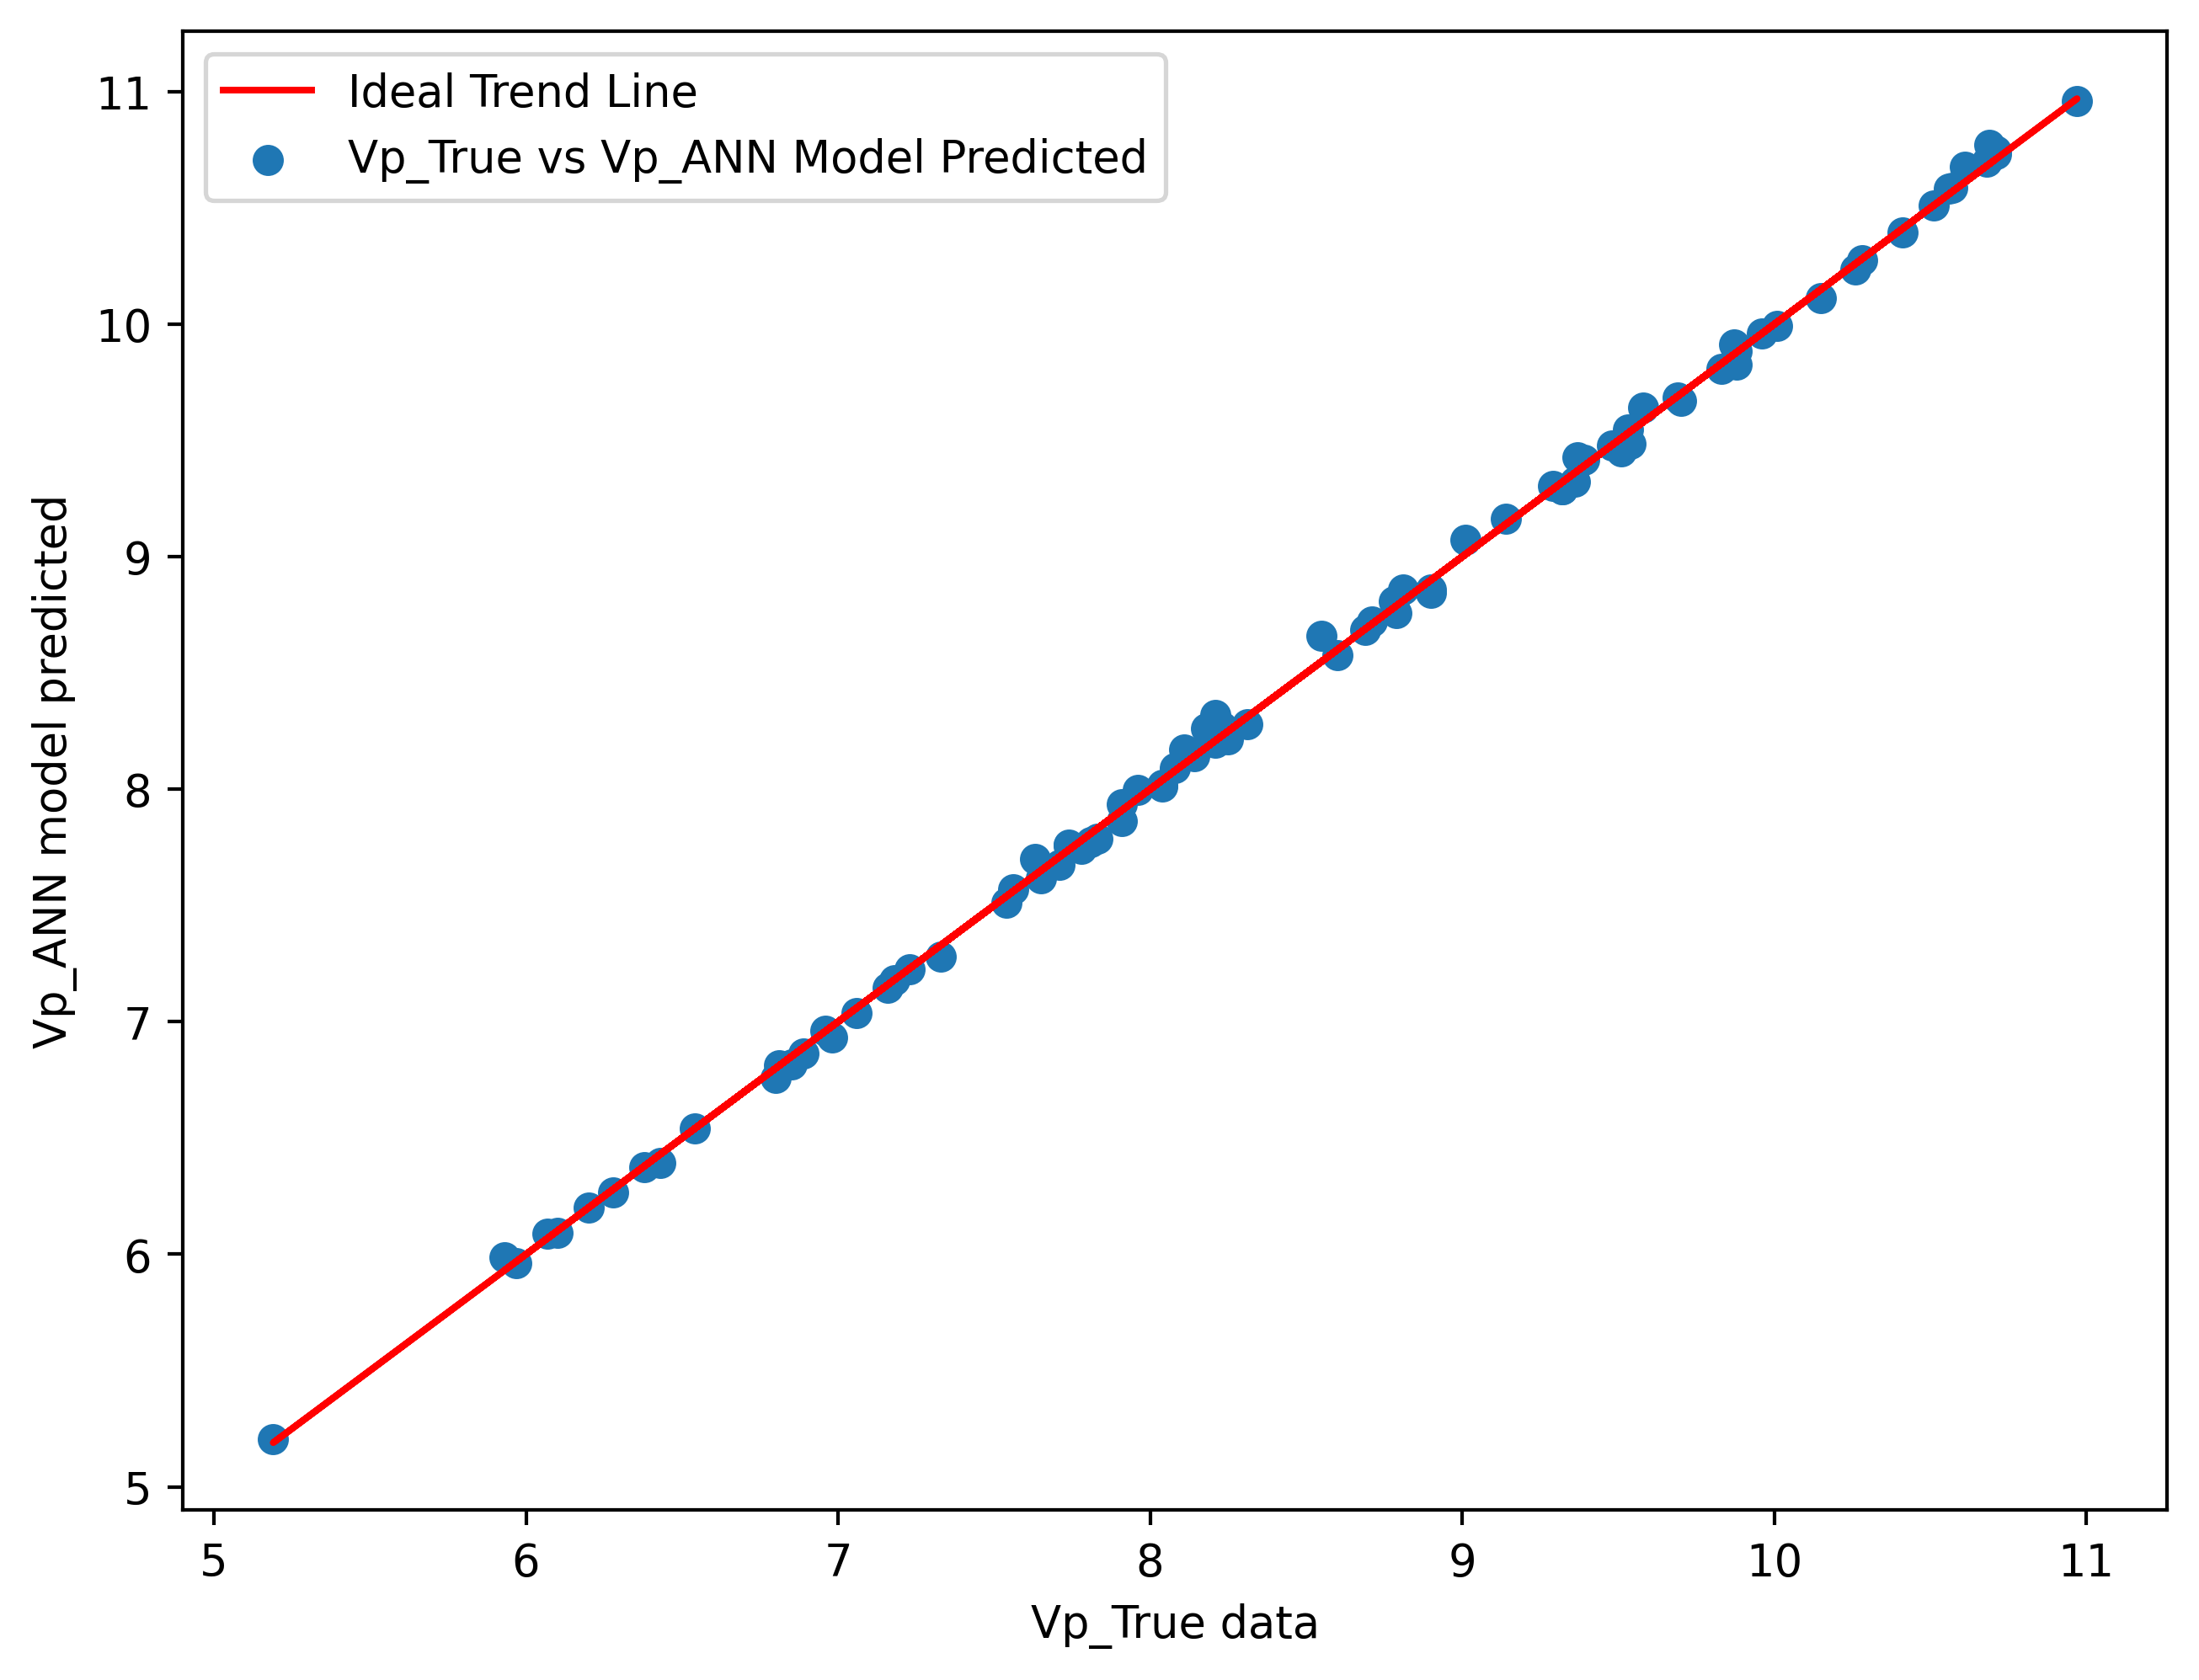

In [44]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=380)

plt.plot(y_test_orig,y_test_orig, 'r')
plt.scatter(y_test_orig, Predictions)

plt.ylabel('Vp_ANN model predicted')
plt.xlabel('Vp_True data')
plt.legend(['Ideal Trend Line','Vp_True vs Vp_ANN Model Predicted'], loc='upper left')

#plt.ylim(2.7, 4.75)
#plt.xlim(2.7, 4.75)

# Model accuracy analysis

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Transformed dataset
mse_no= mean_squared_error(y_test,model.predict(X_test))
r2_no= r2_score(y_test,model.predict(X_test))

# Original dataset after inversion back
#mse_no= mean_squared_error(y_test_orig,Predictions)
#r2_no= r2_score(y_test_orig,Predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [47]:
print('Mean Square Error       :',mse_no)
print('R2 Score                :',r2_no)


Mean Square Error       : 0.0007315337770986948
R2 Score                : 0.9992636070778737


In [48]:
# list all data in history
print(history.history.keys())

dict_keys(['loss'])


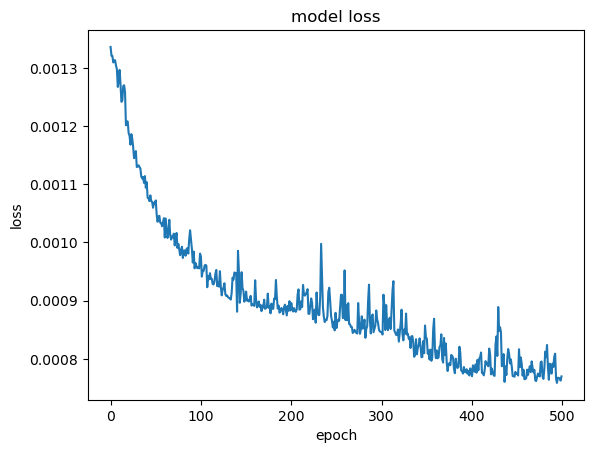

In [49]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['test'], loc='upper right')
#plt.ylim(0, 0.001)
#plt.xlim(0, 1000)
plt.show()

# Discussion

# Reflection

# References

# Conclusion

    Results show that ANN predict the test dataset with the accuracy of R_Squared: 0.999934923476118

    


# Your task #4

    As mentioned, it is now time to Change the file from ballistic to your CleanedFeatureSelected.xlsx file
    
    Then, do the modeling works according to the report hand-in format

    Read the word documents to guide you what kind of experiments you could do...